In [2]:
import sys
from pathlib import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from Data_Generation_Functions import *
import numpy as np

c_Exact = "red"
c_under = "royalblue"
c_Gard = 'lime'
c_under_Corr = "orange"
c_Gard_Corr = "Gray"

SOCF = SOCF_Type.G2


Cython acceleration could not be loaded.
Falling back on Python equivalents... 
Cython acceleration could not be loaded. 
Falling back on Python equivalents...

Computing G2: t=0, M-wise, N=64: 100%|██████████| 501/501 [00:00<00:00, 528507.62config/s]


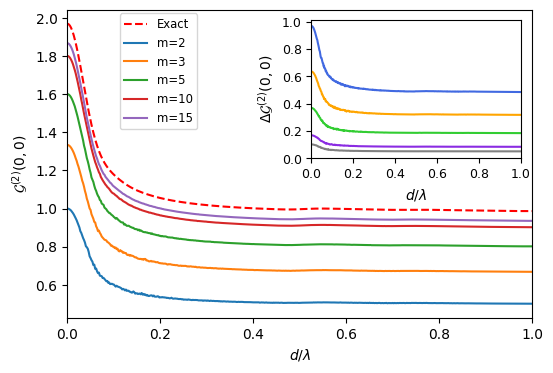

In [3]:
# (fig 3) Plot Convergance of MWise Approximation with Sample Size
N = 8
Dim = 2
m_set = [2, 3, 5, 10, 15]
Num_Samples = 1000
a_set = np.round(np.linspace(0, 1, 501),10)

fig, ax = plt.subplots(figsize=(6, 4))

#Plot Exact Solution
Samples_Exact = Sampling_Methods(SOCF, Approx.EXACT, N, Dim, Num_Samples=Num_Samples)
Filename_Exact = Samples_Exact.Generate_Inverted_Array_Data(a_set)
Data = Read_Write_Class.Read_From_File(Filename_Exact)
Exact_a, Exact_g2 = map(list, zip(*Data))
Exact_a, Exact_g2 = Read_Write_Class.Sort_Both_Lists(Exact_a, Exact_g2) # Sort both lists based on Exact_a values
ax.plot(Exact_a, Exact_g2, label="Exact", color="red", linestyle='dashed')

ax_inset = inset_axes(ax, width="45%", height="45%", loc="upper right", bbox_to_anchor=(-0.01, -0.01, 1, 1), bbox_transform=ax.transAxes)

#Plot M-Wise Approximations
color_set = ["royalblue", 'orange', 'limegreen', 'blueviolet', 'grey']
for m in m_set:
    Samples_MWise = Sampling_Methods(SOCF, Approx.MWISE, N, Dim, m, Num_Samples=Num_Samples)
    Filename_m = Samples_MWise.Generate_Inverted_Array_Data(a_set)
    Data = Read_Write_Class.Read_From_File(Filename_m)

    MWise_a, MWise_g2 = map(list, zip(*Data))
    MWise_a, MWise_g2 = Read_Write_Class.Sort_Both_Lists(MWise_a, MWise_g2) # Sort both lists based on MWise_a values
    ax.plot(MWise_a, MWise_g2, label=f"m={m}")

    ax_inset.plot(MWise_a, np.abs(np.array(MWise_g2) - np.array(Exact_g2)), c=color_set[m_set.index(m)])

ax.set_xlabel('$d/\lambda$')
ax.set_ylabel('$\mathcal{G}^{(2)}(0,0)$')
ax.set_xlim([0, 1])
ax.legend(bbox_to_anchor=(0.1, 0.8), loc='center left', fontsize='small')

ax_inset.set_xlabel('$d/\lambda$')
ax_inset.set_ylabel('$\Delta \mathcal{G}^{(2)}(0,0)$')
ax_inset.set_xlim([0, 1])
ax_inset.tick_params(labelsize=9) 
ax_inset.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
plt.show()


Computing G2: t=0, Exact, N=64: 100%|██████████| 501/501 [00:00<00:00, 182440.21config/s]


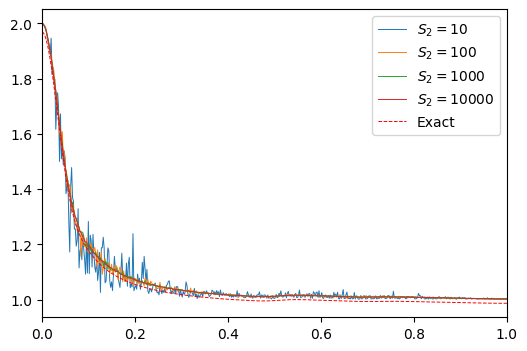

In [4]:
#See the effect of altering the number of samples (S_2) on pairwise method
N = 8
Dim = 2
a_set = np.round(np.linspace(0, 1, 501),10)

fig, ax = plt.subplots(figsize=(6, 4))

S_Set = [10, 100, 1000, 10000]
for S_2 in S_Set:
    Samples_Pair = Sampling_Methods(SOCF, Approx.PAIR, N, Dim, 2, Num_Samples=S_2)
    Filename_m = Samples_Pair.Generate_Inverted_Array_Data(a_set)
    Data = Read_Write_Class.Read_From_File(Filename_m)
    Pair_a, Pair_g2 = map(list, zip(*Data))
    Pair_a, Pair_g2 = Read_Write_Class.Sort_Both_Lists(Pair_a, Pair_g2) 
    ax.plot(Pair_a, Pair_g2, label=f"$S_2 = {S_2}$", linewidth=0.7)

Samples_Exact = Sampling_Methods(SOCF, Approx.EXACT, N, Dim, Num_Samples=Num_Samples)
Filename_Exact = Samples_Exact.Generate_Inverted_Array_Data(a_set)
Data = Read_Write_Class.Read_From_File(Filename_Exact)
Exact_a, Exact_g2 = map(list, zip(*Data))
Exact_a, Exact_g2 = Read_Write_Class.Sort_Both_Lists(Exact_a, Exact_g2) # Sort both lists based on Exact_a values
ax.plot(Exact_a, Exact_g2, label="Exact", color="red", linestyle='dashed', linewidth=0.7)

ax.set_xlim(0,1)
ax.legend()


plt.show()



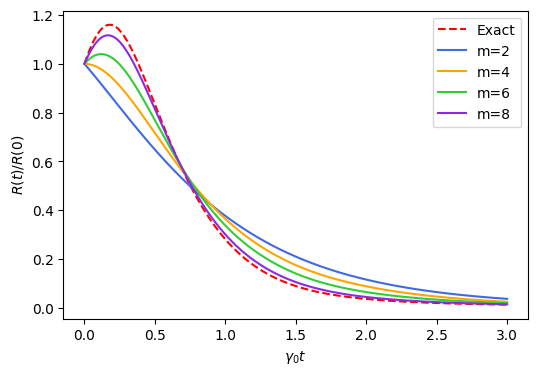

In [5]:
# (Fig 4) Generate Exact Emission Data and m-wise approximation
Dim = 1
N = 9
m_set = [2, 4, 6, 8]
S = 1000
a = 0.1
t_max = 3

#Generate Exact Emission Data
Samples_Exact = Sampling_Methods(SOCF, Approx.EXACT, N, Dim, Num_Samples=S)
Filename_Exact = Samples_Exact.Generate_Emission_Data(a, t_max, res=501)
Data_Exact = Read_Write_Class.Read_From_File(Filename_Exact)
Exact_t, Exact_g2 = map(list, zip(*Data_Exact))

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(Exact_t, Exact_g2, label="Exact", color="red", linestyle='dashed')

cols = ["royalblue", 'orange', 'limegreen', 'blueviolet', 'grey']
for i,m in enumerate(m_set):
    Samples_MWise = Sampling_Methods(SOCF_Type.G2, Approx.MWISE, N, Dim, m, Num_Samples=S)
    Filename_m = Samples_MWise.Generate_Emission_Data(a, t_max)
    Data_m = Read_Write_Class.Read_From_File(Filename_m)
    MWise_t, MWise_g2 = map(list, zip(*Data_m))
    ax.plot(MWise_t, MWise_g2, label=f"m={m}", c=cols[i])

ax.set_xlabel('$\gamma_0 t$')
ax.set_ylabel('$R(t)/R(0)$')
ax.legend()
plt.show()



Computing G2: t=0, Pairwise, N=64: 100%|██████████| 501/501 [00:00<00:00, 514405.46config/s]


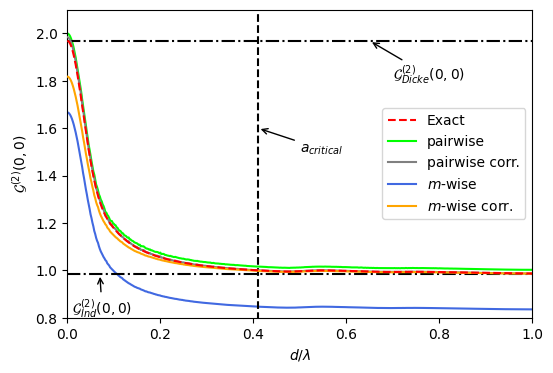

In [6]:
# (Fig 5) Plot Comparison of Exact and approx methods
N = 8
Dim = 2
m = 6
Num_Samples = 1000
S_2 = 10000
S_m = 5000
a_set = np.round(np.linspace(0, 1, 501),10)

fig, ax = plt.subplots(figsize=(6, 4))

Samples_Exact = Sampling_Methods(SOCF, Approx.EXACT, N, Dim, Num_Samples=Num_Samples)
Filename_Exact = Samples_Exact.Generate_Inverted_Array_Data(a_set)
Data = Read_Write_Class.Read_From_File(Filename_Exact)
Exact_a, Exact_g2 = map(list, zip(*Data))
Exact_a, Exact_g2 = Read_Write_Class.Sort_Both_Lists(Exact_a, Exact_g2) # Sort both lists based on Exact_a values
ax.plot(Exact_a, Exact_g2, label="Exact", linestyle='dashed', c=c_Exact, zorder=5)

Samples_MWise = Sampling_Methods(SOCF, Approx.MWISE, N, Dim, m, Num_Samples=S_m)
Filename_m = Samples_MWise.Generate_Inverted_Array_Data(a_set)
Data = Read_Write_Class.Read_From_File(Filename_m)
MWise_a, MWise_g2 = map(list, zip(*Data))
MWise_a, MWise_g2 = Read_Write_Class.Sort_Both_Lists(MWise_a, MWise_g2) # Sort both lists based on MWise_a values

Samples_Pair = Sampling_Methods(SOCF, Approx.PAIR, N, Dim, 2, Num_Samples=S_2)
Filename_Pair = Samples_Pair.Generate_Inverted_Array_Data(a_set)
Data = Read_Write_Class.Read_From_File(Filename_Pair)
Pair_a, Pair_g2 = map(list, zip(*Data))
Pair_a, Pair_g2 = Read_Write_Class.Sort_Both_Lists(Pair_a, Pair_g2) 


Mwise_Offset = 1/m - 1/N**Dim
Pair_Offset = 1/N**Dim

ax.plot(Pair_a, Pair_g2, label="pairwise", c=c_Gard, zorder=1)
ax.plot(Pair_a, np.array(Pair_g2) - Pair_Offset, label="pairwise corr.", c=c_Gard_Corr, zorder=3)
ax.plot(MWise_a, MWise_g2, label="$m$-wise", c=c_under, zorder=1)
ax.plot(MWise_a, np.array(MWise_g2) + Mwise_Offset, label="$m$-wise corr.", c=c_under_Corr, zorder=3)


ax.plot([0,1],[2*63/64,2*63/64], linestyle='dashdot', c='black')
ax.plot([0,1],[63/64, 63/64], linestyle='dashdot', c='black')

a_trans = Exact_a[np.argmin(np.abs(np.array(Exact_g2)-1))]
ax.plot([a_trans, a_trans],[0.79, 2.2], linestyle='dashed', c='black')

ax.annotate("$a_{critical}$", xy=(a_trans, 1.6),  xytext=(0.5, 1.5), 
            arrowprops=dict(arrowstyle="->", color="black", lw=1), fontsize=10)
ax.annotate("$\mathcal{G}_{Dicke}^{(2)}(0,0)$", xy=(0.65, 2*63/64),  xytext=(0.7, 1.8), 
            arrowprops=dict(arrowstyle="->", color="black", lw=1), fontsize=10)
ax.annotate("$\mathcal{G}_{Ind}^{(2)}(0,0)$", xy=(0.07, 63/64),  xytext=(0.01, 0.815), 
            arrowprops=dict(arrowstyle="->", color="black", lw=1), fontsize=10)

ax.set_xlabel('$d/\lambda$')
ax.set_ylabel('$\mathcal{G}^{(2)}(0,0)$')
ax.set_ylim([0.8, 2.1])
ax.set_xlim([0, 1])
ax.legend()
plt.show()

Computing G2: t=0, Pairwise, N=19: 100%|██████████| 501/501 [00:00<00:00, 542703.07config/s]


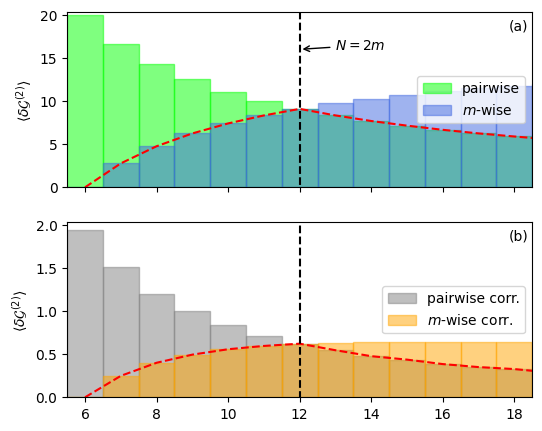

In [7]:
# (Fig 6) Plot showing the analyitcal condition N < 2m for inverted array  (with and without correction)

Dim = 1
m = 6
N_Set = np.arange(m, 20)
S_2 = 10000
S_m = 5000

a_set = np.round(np.linspace(0, 1, 501),10)

fig, axes = plt.subplots(2, 1, figsize=(6, 5))


Diff_Pair = []
Diff_Pair_corr = []
Diff_m = []
Diff_m_corr = []
for N in N_Set:
    m_corr = 1/m - 1/N
    pair_corr = 1/N

    Samples_Exact = Sampling_Methods(SOCF, Approx.EXACT, N, Dim, Num_Samples=S_m)
    Filename_Exact = Samples_Exact.Generate_Inverted_Array_Data(a_set)
    Data = Read_Write_Class.Read_From_File(Filename_Exact)
    Exact_a, Exact_g2 = map(list, zip(*Data))
    Exact_a, Exact_g2 = Read_Write_Class.Sort_Both_Lists(Exact_a, Exact_g2)

    Samples_MWise = Sampling_Methods(SOCF, Approx.MWISE, N, Dim, m, Num_Samples=S_m)
    Filename_m = Samples_MWise.Generate_Inverted_Array_Data(a_set)
    Data = Read_Write_Class.Read_From_File(Filename_m)
    MWise_a, MWise_g2 = map(list, zip(*Data))
    MWise_a, MWise_g2 = Read_Write_Class.Sort_Both_Lists(MWise_a, MWise_g2)

    Samples_Pair = Sampling_Methods(SOCF, Approx.PAIR, N, Dim, 2, Num_Samples=S_2)
    Filename_m = Samples_Pair.Generate_Inverted_Array_Data(a_set)
    Data = Read_Write_Class.Read_From_File(Filename_m)
    Pair_a, Pair_g2 = map(list, zip(*Data))
    Pair_a, Pair_g2 = Read_Write_Class.Sort_Both_Lists(Pair_a, Pair_g2)

    Diff_Pair.append(100 * np.mean(np.abs(np.array(Pair_g2) - np.array(Exact_g2)) / np.array(Exact_g2)))
    Diff_Pair_corr.append(100 * np.mean(np.abs(np.array(Pair_g2) - pair_corr - np.array(Exact_g2)) / np.array(Exact_g2)))
    Diff_m.append(100 * np.mean(np.abs(np.array(MWise_g2) - np.array(Exact_g2)) / np.array(Exact_g2)))
    Diff_m_corr.append(100 * np.mean(np.abs(np.array(MWise_g2) + m_corr - np.array(Exact_g2)) / np.array(Exact_g2)))

axes[0].bar(N_Set, Diff_Pair, width=1, alpha=0.5, facecolor=c_Gard, edgecolor=c_Gard, label="pairwise")
axes[1].bar(N_Set, Diff_Pair_corr, width=1, alpha=0.5, facecolor=c_Gard_Corr, edgecolor=c_Gard_Corr, label="pairwise corr.")

axes[0].bar(N_Set, Diff_m, width=1, alpha=0.5, facecolor=c_under, edgecolor=c_under, label="$m$-wise")
axes[1].bar(N_Set, Diff_m_corr, width=1, alpha=0.5, facecolor=c_under_Corr, edgecolor=c_under_Corr, label='$m$-wise corr.')

Min = np.minimum(Diff_m, Diff_Pair)
axes[0].plot(N_Set, Min, c='red', linestyle='dashed')
Min_Corr = np.minimum(Diff_m_corr, Diff_Pair_corr)
axes[1].plot(N_Set, Min_Corr, c='red', linestyle='dashed')

N_ticks = [i for i in N_Set if i%2 == 0]
axes[0].set_xticks(N_ticks, ["" for i in N_ticks] )
axes[1].set_xticks(N_ticks)
axes[0].set_ylim([0,20.3])
axes[1].set_ylim([0,2.03])
for i in range(2):
    axes[i].set_xlim([min(N_Set)-0.5, max(N_Set)-0.5])
    axes[i].plot([2*m, 2*m], [-1, 30], linestyle='dashed', c='black')
    axes[i].set_ylabel("$\\langle \delta \mathcal{G}^{(2)} \\rangle$")
    axes[i].legend(loc = "center right")

axes[0].annotate("$N=2m$", xy=(2*m, 16),  xytext=(2*m+1, 16), 
            arrowprops=dict(arrowstyle="->", color="black", lw=1), fontsize=10)

axes[0].text(0.95, 0.9, "(a)", transform=axes[0].transAxes)
axes[1].text(0.95, 0.9, "(b)", transform=axes[1].transAxes)

plt.show()


Computing G2: t=inf, Pairwise, N=64: 100%|██████████| 24/24 [00:00<00:00, 347114.81config/s]


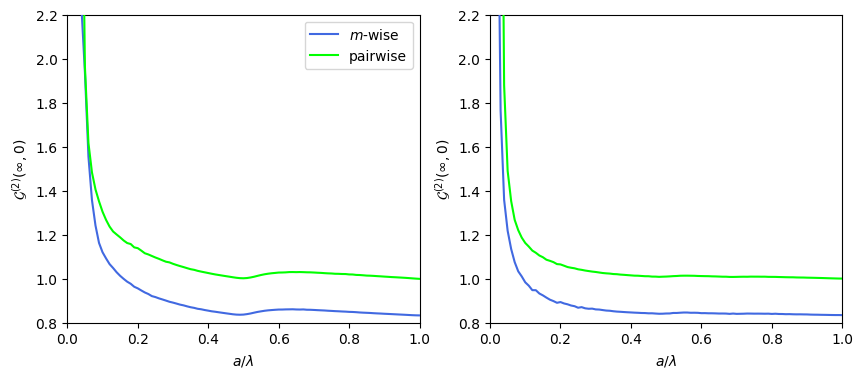

In [8]:
# (Fig 7) Comaprison of approximaitons in the Steady state NOT DONE
kL = [1,0,0]
Rabi = 5

m = 6
S_m = 100
S_2 = 10000

a_set_temp = np.round(np.linspace(0, 1, 26),10)
a_set = np.array([a for a in a_set_temp if a >= 0.05])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))


Dim = 1
N = 8
"""Samples_Exact = Sampling_Methods(SOCF, Approx.EXACT, N, Dim)
Filename_Exact = Samples_Exact.Generate_Steady_State_Data(a_set, Rabi, Inv_Metre_Class(kL, "Nat"))
Data = Read_Write_Class.Read_From_File(Filename_Exact)
Exact_a, Exact_g2 = map(list, zip(*Data))
Exact_a, Exact_g2 = Read_Write_Class.Sort_Both_Lists(Exact_a, Exact_g2) 
axes[0].plot(Exact_a, Exact_g2, label="Exact", linestyle='dashed', c=c_Exact, zorder=5)"""

Samples_mwise = Sampling_Methods(SOCF, Approx.MWISE, N, Dim, m=m, Num_Samples=S_m)
Filename_mwise = Samples_mwise.Generate_Steady_State_Data(a_set, Rabi, Inv_Metre_Class(kL, "Nat"))
Data = Read_Write_Class.Read_From_File(Filename_mwise)
mwise_a, mwise_g2 = map(list, zip(*Data))
mwise_a, mwise_g2 = Read_Write_Class.Sort_Both_Lists(mwise_a, mwise_g2) 
axes[0].plot(mwise_a, mwise_g2, label="$m$-wise", c=c_under, zorder=5)

Samples_pair = Sampling_Methods(SOCF, Approx.PAIR, N, Dim, Num_Samples=S_2)
Filename_pair = Samples_pair.Generate_Steady_State_Data(a_set, Rabi, Inv_Metre_Class(kL, "Nat"))
Data = Read_Write_Class.Read_From_File(Filename_pair)
pair_a, pair_g2 = map(list, zip(*Data))
pair_a, pair_g2 = Read_Write_Class.Sort_Both_Lists(pair_a, pair_g2) 
axes[0].plot(pair_a, pair_g2, label="pairwise", c=c_Gard, zorder=5)

Dim=2
N=8
Samples_mwise = Sampling_Methods(SOCF, Approx.MWISE, N, Dim, m=m, Num_Samples=S_m)
Filename_mwise = Samples_mwise.Generate_Steady_State_Data(a_set, Rabi, Inv_Metre_Class(kL, "Nat"))
Data = Read_Write_Class.Read_From_File(Filename_mwise)
mwise_a, mwise_g2 = map(list, zip(*Data))
mwise_a, mwise_g2 = Read_Write_Class.Sort_Both_Lists(mwise_a, mwise_g2) 
axes[1].plot(mwise_a, mwise_g2, label="$m$-wise",  c=c_under, zorder=5)

Samples_pair = Sampling_Methods(SOCF, Approx.PAIR, N, Dim, Num_Samples=S_2)
Filename_pair = Samples_pair.Generate_Steady_State_Data(a_set, Rabi, Inv_Metre_Class(kL, "Nat"))
Data = Read_Write_Class.Read_From_File(Filename_pair)
pair_a, pair_g2 = map(list, zip(*Data))
pair_a, pair_g2 = Read_Write_Class.Sort_Both_Lists(pair_a, pair_g2) 
axes[1].plot(pair_a, pair_g2, label="pairwise", c=c_Gard, zorder=5)


for i in range(2):
    axes[i].set_xlabel("$a/\lambda$")
    axes[i].set_ylabel("$\mathcal{G}^{(2)}(\infty, 0)$")
    axes[i].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axes[i].set_xlim([0, np.max(a_set)])
    axes[i].set_ylim([0.8, 2.2])
axes[0].legend()
plt.show()


Computing G2: t=2, Pairwise, N=64: 100%|██████████| 486/486 [00:00<00:00, 492851.00config/s]


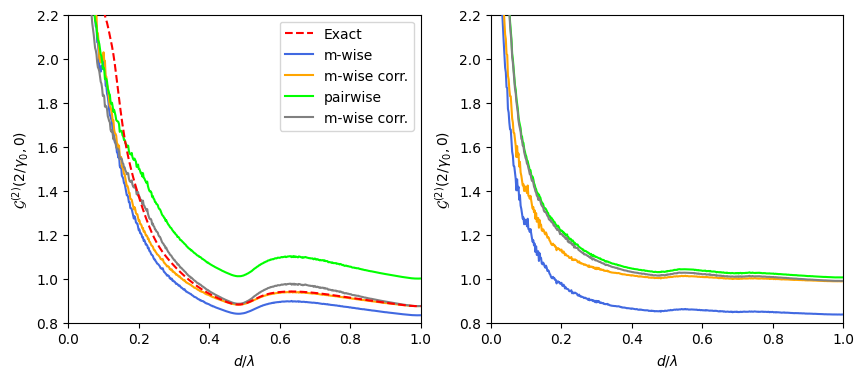

In [9]:
# (Fig 8) Comparison of approximate methods for a system freely evolved to a finite time

m = 6
S_m = 200
S_2 = 10000

a_set_temp = np.round(np.linspace(0, 1, 501),10)
a_set = np.array([a for a in a_set_temp if a >= 0.03])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#1D of 8 emitters, compare exact to both approximations
Dim = 1
N = 8
Samples_Exact = Sampling_Methods(SOCF, Approx.EXACT, N, Dim) #exact sampling method computation
Filename_Exact = Samples_Exact.Generate_Finite_time_Data(a_set, 2)
Data = Read_Write_Class.Read_From_File(Filename_Exact)
Exact_a, Exact_g2 = map(list, zip(*Data))
Exact_a, Exact_g2 = Read_Write_Class.Sort_Both_Lists(Exact_a, Exact_g2) 
axes[0].plot(Exact_a, Exact_g2, label="Exact", linestyle='dashed', c=c_Exact, zorder=10)

Samples_MWise = Sampling_Methods(SOCF, Approx.MWISE, N, Dim, m, Num_Samples=S_m) #m-wise sampling method computation
Filename_MWise = Samples_MWise.Generate_Finite_time_Data(a_set, 2)
Data = Read_Write_Class.Read_From_File(Filename_MWise)
MWise_a, MWise_g2 = map(list, zip(*Data))
MWise_a, MWise_g2 = Read_Write_Class.Sort_Both_Lists(MWise_a, MWise_g2) 
axes[0].plot(MWise_a, MWise_g2, label="m-wise", c=c_under, zorder=5)
axes[0].plot(MWise_a, np.array(MWise_g2) + ((1/m) - (1/(N**Dim))) , label="m-wise corr.", c=c_under_Corr, zorder=5)

Samples_Pair = Sampling_Methods(SOCF, Approx.PAIR, N, Dim, Num_Samples=S_2) #pairwise sampling method computation
Filename_Pair = Samples_Pair.Generate_Finite_time_Data(a_set, 2)
Data = Read_Write_Class.Read_From_File(Filename_Pair)
Pair_a, Pair_g2 = map(list, zip(*Data))
Pair_a, Pair_g2 = Read_Write_Class.Sort_Both_Lists(Pair_a, Pair_g2) 
axes[0].plot(Pair_a, Pair_g2, label="pairwise", c=c_Gard, zorder=5)
axes[0].plot(Pair_a, np.array(Pair_g2) - (1/(N**Dim)) , label="m-wise corr.", c=c_Gard_Corr, zorder=5)


#2D square array of 64 emitters, compare both approximations (exact cannot be computed)
Dim = 2
N = 8
Samples_MWise = Sampling_Methods(SOCF, Approx.MWISE, N, Dim, m, Num_Samples=S_m) #m-wise sampling method computation
Filename_MWise = Samples_MWise.Generate_Finite_time_Data(a_set, 2)
Data = Read_Write_Class.Read_From_File(Filename_MWise)
MWise_a, MWise_g2 = map(list, zip(*Data))
MWise_a, MWise_g2 = Read_Write_Class.Sort_Both_Lists(MWise_a, MWise_g2) 
axes[1].plot(MWise_a, MWise_g2, label="m-wise", c=c_under, zorder=5)
axes[1].plot(MWise_a, np.array(MWise_g2) + ((1/m) - (1/(N**Dim))) , label="m-wise corr.", c=c_under_Corr, zorder=5)

Samples_Pair = Sampling_Methods(SOCF, Approx.PAIR, N, Dim, Num_Samples=S_2) #pairwise sampling method computation
Filename_Pair = Samples_Pair.Generate_Finite_time_Data(a_set, 2)
Data = Read_Write_Class.Read_From_File(Filename_Pair)
Pair_a, Pair_g2 = map(list, zip(*Data))
Pair_a, Pair_g2 = Read_Write_Class.Sort_Both_Lists(Pair_a, Pair_g2) 
axes[1].plot(Pair_a, Pair_g2, label="pairwise", c=c_Gard, zorder=5)
axes[1].plot(Pair_a, np.array(Pair_g2) - (1/(N**Dim)) , label="m-wise corr.", c=c_Gard_Corr, zorder=5)



for i in range(2):
    axes[i].set_xlabel("$d/\lambda$")
    axes[i].set_ylabel("$\mathcal{G}^{(2)}(2/\gamma_0, 0)$")
    axes[i].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axes[i].set_xlim([0, np.max(a_set)])
    axes[i].set_ylim([0.8, 2.2])

axes[0].legend()
plt.show()


Inverted Sample, m=4: 0config [00:00, ?config/s]
Inverted Sample, m=5: 0config [00:00, ?config/s]
Inverted Sample, m=6: 0config [00:00, ?config/s]
Inverted Sample, m=7: 0config [00:00, ?config/s]
Finite Time Sample, m=4: 0config [00:00, ?config/s]
Finite Time Sample, m=5: 0config [00:00, ?config/s]
Finite Time Sample, m=6: 0config [00:00, ?config/s]
Finite Time Sample, m=7: 0config [00:00, ?config/s]
Steady State Sample, m=4: 0config [00:00, ?config/s]
Steady State Sample, m=5: 0config [00:00, ?config/s]
Steady State Sample, m=6: 0config [00:00, ?config/s]
Steady State Sample, m=7: 0config [00:00, ?config/s]


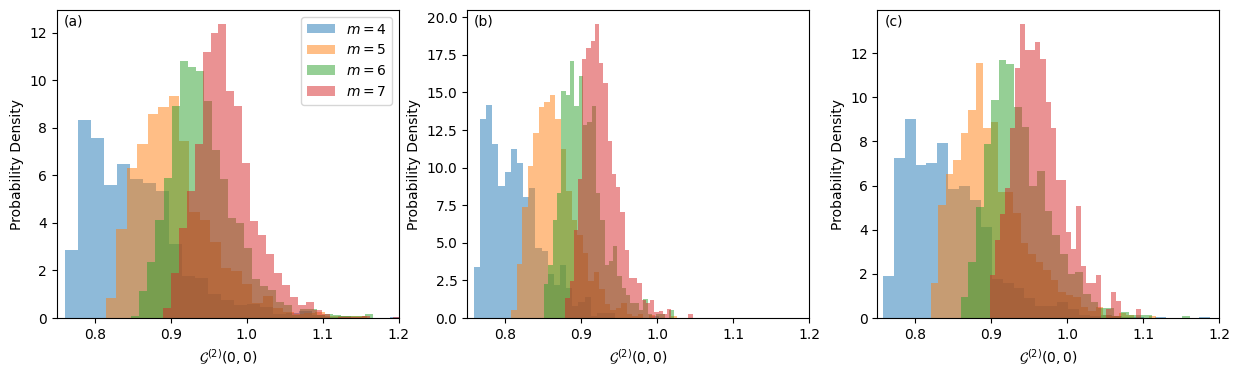

For Inverted Array m=4: μ=0.852, σ=0.063
For Inverted Array m=5: μ=0.906, σ=0.051
For Inverted Array m=6: μ=0.942, σ=0.044
For Inverted Array m=7: μ=0.972, σ=0.038
For Finite Time Array m=4: μ=0.813, σ=0.036
For Finite Time Array m=5: μ=0.866, σ=0.03
For Finite Time Array m=6: μ=0.902, σ=0.027
For Finite Time Array m=7: μ=0.927, σ=0.023
For Steady State Array m=4: μ=0.842, σ=0.056
For Steady State Array m=5: μ=0.899, σ=0.047
For Steady State Array m=6: μ=0.937, σ=0.041
For Steady State Array m=7: μ=0.963, σ=0.034


In [19]:
# (Fig 9) Appendix 1: Plot the dist. of m-wise samples for different values of m

m_set = [4,5,6,7]

a = 0.1
N = 11
Dim = 2
Bins = 30

fig, ax = plt.subplots(1, 3, figsize=(15, 4))

means_Inv = []
stds_Inv = []
Num_Samples_Inv = 0 #Set to 0 to only show plot, >0 will generate more data in each distribution
for m in m_set:
    Samples_mwise = Sampling_Methods(SOCF, Approx.MWISE, N, Dim, m=m)
    Data = Samples_mwise.Inverted_Array_Distributions(a, Num_Samples_Inv)
    means_Inv.append(np.mean(Data))
    stds_Inv.append(np.std(Data))
    ax[0].hist(Data, Bins, alpha=0.5, density=True, label="$m=$"+str(m))

means_Fin = []
stds_Fin = []
t=2
Num_Samples_Fin = 0 #Set to 0 to only show plot, >0 will generate more data in each distribution
for m in m_set:
    Samples_mwise = Sampling_Methods(SOCF, Approx.MWISE, N, Dim, m=m)
    Data = Samples_mwise.Finite_Time_Distributions(a, Num_Samples_Fin, t)
    means_Fin.append(np.mean(Data))
    stds_Fin.append(np.std(Data))
    ax[1].hist(Data, Bins, alpha=0.5, density=True, label="$m=$"+str(m))

means_SS= []
stds_SS = []
Num_Samples_SS = 0 #Set to 0 to only show plot, >0 will generate more data in each distribution
Rabi = 5
kL = Inv_Metre_Class([1,0,0],"Nat")
for m in m_set:
    Samples_mwise = Sampling_Methods(SOCF, Approx.MWISE, N, Dim, m=m)
    Data = Samples_mwise.Steady_State_Distributions(a, Num_Samples_SS, Rabi, kL)
    means_SS.append(np.mean(Data))
    stds_SS.append(np.std(Data))
    ax[2].hist(Data, Bins, alpha=0.5, density=True, label="$m=$"+str(m))



#ax[0].set_xlim([0.8, 1.2])
for i in range(3):
    ax[i].set_ylabel("Probability Density")
    ax[i].set_xlabel("$\mathcal{G}^{(2)}(0,0)$")
    ax[i].set_xlim([0.75, 1.2])
ax[0].legend()

labels = ["a", "b", "c"]
for i in range(3):
    ax[i].text(0.02, 0.95, f"({labels[i]})", transform=ax[i].transAxes)
plt.show()

for i,m in enumerate(m_set):
    print(f"For Inverted Array m={m}: \u03BC={np.round(means_Inv[i],3)}, \u03C3={np.round(stds_Inv[i],3)}")

for i,m in enumerate(m_set):
    print(f"For Finite Time Array m={m}: \u03BC={np.round(means_Fin[i],3)}, \u03C3={np.round(stds_Fin[i],3)}")

for i,m in enumerate(m_set):
    print(f"For Steady State Array m={m}: \u03BC={np.round(means_SS[i],3)}, \u03C3={np.round(stds_SS[i],3)}")

